In [27]:
import pandas as pd 
import numpy as np
from FileOpener.CSVReader.CSVReader import CSVReader as csv
from FileOpener.backtester import FinancialBacktest, Plot, PfAnalysis

## 영업이익 데이터 / 분기

In [9]:
fin_dir = "CSVFile/FinancialData/Korea"

KDQ_op_income = csv.financial_reader("OP_INCOME_KDQ.csv", fin_dir).shift(1)
KSE_op_income = csv.financial_reader("OP_INCOME_KSE.csv", fin_dir).shift(1)

## 영업이익 적자 VS 흑자

### 방법

유니버스: 코스피 / 코스닥 <br>
기간 : 2000-04-01 ~ 2018-12-31 <br>
방법 : 영업이익 적자 / 흑자인 기업에 동일 배분 후 분기간 리밸런싱

## 분기 영업이익 적자 흑자 데이터 생성

In [45]:
KDQ_OP_MINUS = KDQ_op_income < 0
KSE_OP_MINUS = KSE_op_income < 0

KDQ_OP_PLUS = KDQ_op_income > 0
KSE_OP_PLUS = KSE_op_income > 0

In [23]:
price_dir = "CSVFile/Price/Korea/Stocks"

KDQ_price = csv.price_reader("KOSDAQ_FROM_1998_close.csv", price_dir)
KSE_price = csv.price_reader("KOSPI_FROM_1998_close.csv", price_dir)

In [25]:
KDQ = FinancialBacktest(KDQ_price)
KSE = FinancialBacktest(KSE_price)

In [46]:
KDQ_back_rt = KDQ.backtest(KDQ_OP_MINUS, 'Q','Q')
KSE_back_rt = KSE.backtest(KSE_OP_MINUS, 'Q','Q')
KDQ_MORE_back_rt = KDQ.backtest(KDQ_OP_PLUS, 'Q','Q')
KSE_MORE_back_rt = KSE.backtest(KSE_OP_PLUS, 'Q','Q')

D:\WiseData\FileOpener\backtester.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  ret.loc[:'1998-05-23'][ret.loc[:'1998-05-23'] > 1.08] = 1.08
C:\Users\fnguide\Anaconda3\lib\site-packages\pandas\core\frame.py:3163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)
D:\WiseData\FileOpener\backtester.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vie

## 성과 분석

In [47]:
KDQ_back_pf = PfAnalysis(KDQ_back_rt)
KSE_back_pf = PfAnalysis(KSE_back_rt)
KDQ_MORE_back_pf = PfAnalysis(KDQ_MORE_back_rt)
KSE_MORE_back_pf = PfAnalysis(KSE_MORE_back_rt)

## 영업이익 코스피

### KOSDAQ

In [56]:
KDQ_back_pf.rt_preety_print()

평균수익률    14.36%
기하수익률     4.44%
중간수익률     3.70%
dtype: object

In [57]:
KDQ_MORE_back_pf.rt_preety_print()

평균수익률    21.06%
기하수익률    13.38%
중간수익률    12.95%
dtype: object

In [58]:
KDQ_back_pf.vol_preety_print()

변동성              26.42%
Upside Dev.      16.48%
Downside Dev.    24.05%
MDD              64.35%
dtype: object

In [59]:
KDQ_MORE_back_pf.vol_preety_print()

변동성              24.60%
Upside Dev.      14.98%
Downside Dev.    22.98%
MDD              58.06%
dtype: object

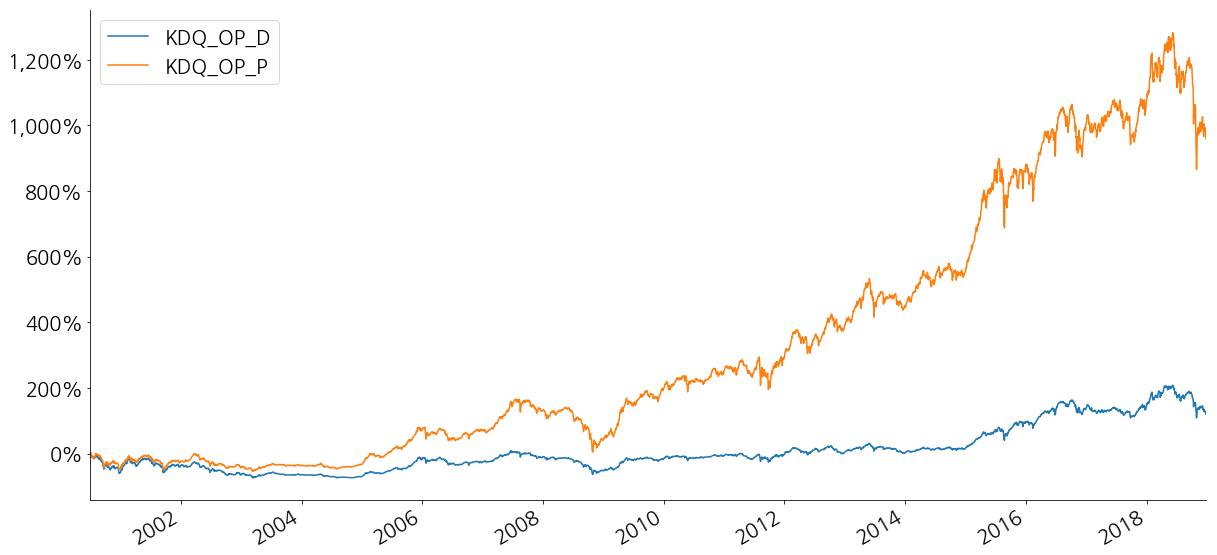

In [54]:
fig, ax = Plot().TimeSeries()
KDQ_back_pf.cumReturn().rename('KDQ_OP_D').sub(1).plot(ax = ax, legend=True)
KDQ_MORE_back_pf.cumReturn().rename('KDQ_OP_P').sub(1).plot(ax = ax, legend=True)

## KOSPI

In [32]:
KSE_back_pf.rt_preety_print()

평균수익률    8.07%
기하수익률    2.81%
중간수익률    0.17%
dtype: object

In [35]:
KSE_back_pf.vol_preety_print()

변동성              21.66%
Upside Dev.      12.75%
Downside Dev.    20.02%
MDD              60.42%
dtype: object

In [60]:
KSE_MORE_back_pf.rt_preety_print()

평균수익률    18.34%
기하수익률    14.39%
중간수익률    11.91%
dtype: object

In [61]:
KSE_MORE_back_pf.vol_preety_print()

변동성              19.73%
Upside Dev.      11.75%
Downside Dev.    18.19%
MDD              55.87%
dtype: object

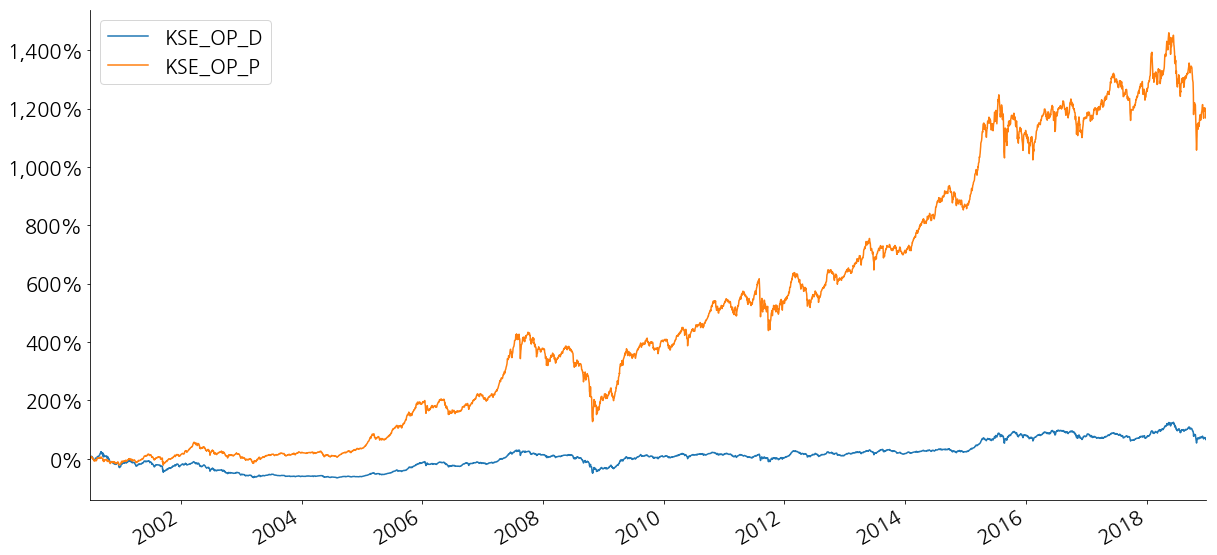

In [53]:
fig, ax = Plot().TimeSeries()
KSE_back_pf.cumReturn().rename('KSE_OP_D').sub(1).plot(ax = ax, legend=True)
KSE_MORE_back_pf.cumReturn().rename('KSE_OP_P').sub(1).plot(ax = ax, legend=True)